A copy of the tensorflow example at https://www.tensorflow.org/tutorials/keras/regression

In [1]:
!pip install -q seaborn
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [5]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Patrick\\.keras\\datasets\\auto-mpg.data'

In [6]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset = dataset.dropna()

In [9]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [10]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [11]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

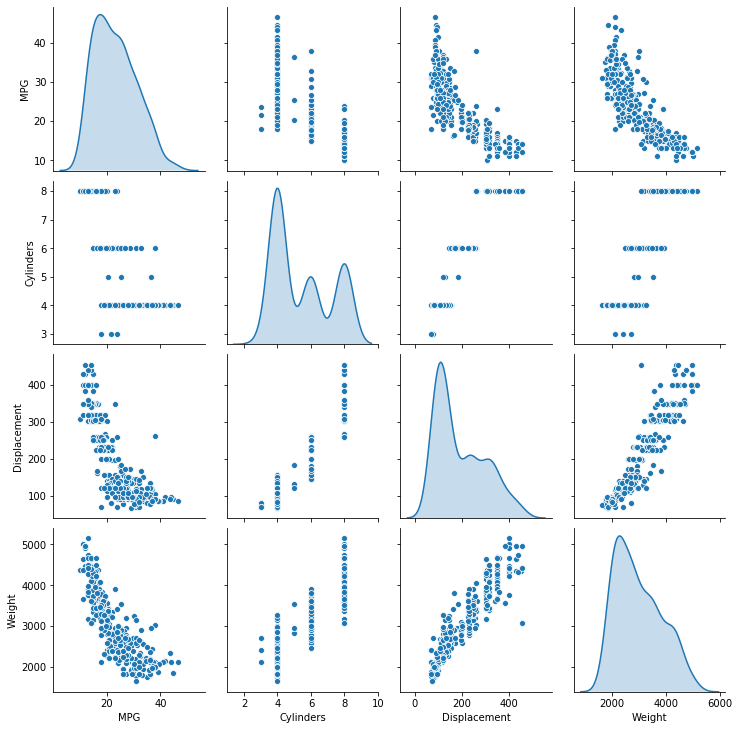

In [12]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [13]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [14]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [15]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [16]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [17]:
model = build_model()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [19]:
example_batch = normed_train_data[:10].values
print(example_batch)
example_result = model.predict(example_batch)
example_result

[[-0.86934805 -1.0094591  -0.78405236 -1.0253028  -0.3797592  -0.51639657
  -0.46514837 -0.49522541  0.77467638]
 [-0.86934805 -0.53021786 -0.4428111  -0.11879578  0.62410217  0.84390983
  -0.46514837 -0.49522541  0.77467638]
 [ 1.48388718  1.48259536  1.44714046  1.73687741 -0.73828112 -1.06051913
  -0.46514837 -0.49522541  0.77467638]
 [-0.86934805 -0.86568673 -1.09904428 -1.0253028  -0.30805482  1.66009367
  -0.46514837 -0.49522541  0.77467638]
 [-0.86934805 -0.94236533 -0.99404698 -1.00160327  0.87506751  1.11597111
  -0.46514837  2.01285166 -1.28675059]
 [ 0.30726957  0.35158603 -0.39031245  0.2603967   0.58824997  0.57184855
  -0.46514837 -0.49522541  0.77467638]
 [-0.86934805 -1.01904392 -1.17779227 -1.21134411  1.16188504  1.11597111
  -0.46514837  2.01285166 -1.28675059]
 [-0.86934805 -0.47270891 -0.99404698  0.30779576  2.2374508   1.11597111
   2.143005   -0.49522541 -1.28675059]
 [ 0.30726957  0.02570198 -0.25906581  0.13241924  0.33728463 -0.51639657
  -0.46514837 -0.49522

array([[-0.13700531],
       [-0.27722043],
       [-0.4258697 ],
       [-0.00739127],
       [-0.19221726],
       [-0.2149032 ],
       [-0.17998543],
       [-0.2751783 ],
       [-0.2612903 ],
       [-0.03078602]], dtype=float32)

In [21]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:575.1030,  mae:22.7246,  mse:575.1030,  val_loss:567.6468,  val_mae:22.5112,  val_mse:567.6468,  
....................................................................................................
Epoch: 100, loss:6.0400,  mae:1.7383,  mse:6.0400,  val_loss:8.3422,  val_mae:2.1902,  val_mse:8.3422,  
....................................................................................................
Epoch: 200, loss:5.0791,  mae:1.5622,  mse:5.0791,  val_loss:7.9468,  val_mae:2.1573,  val_mse:7.9468,  
....................................................................................................
Epoch: 300, loss:4.7283,  mae:1.4454,  mse:4.7283,  val_loss:7.9346,  val_mae:2.1696,  val_mse:7.9346,  
....................................................................................................
Epoch: 400, loss:4.1073,  mae:1.3614,  mse:4.1073,  val_loss:8.0213,  val_mae:2.2091,  val_mse:8.0213,  
..............................................................

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.428856,1.013402,2.428856,8.943907,2.291951,8.943907,995
996,2.550440,1.063981,2.550440,9.128030,2.266171,9.128030,996
997,2.315182,0.952533,2.315182,9.039744,2.294854,9.039744,997
998,2.339201,0.971018,2.339201,9.483716,2.375086,9.483716,998
999,2.255274,0.976504,2.255274,9.706287,2.430614,9.706287,999


In [23]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

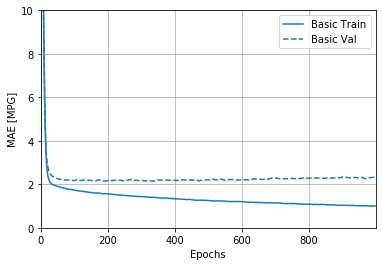

In [24]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

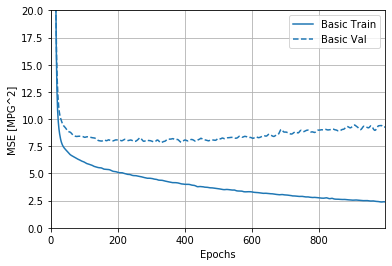

In [25]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [26]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:561.6752,  mae:22.4844,  mse:561.6752,  val_loss:551.2091,  val_mae:22.2019,  val_mse:551.2091,  
...........................................................

Text(0, 0.5, 'MAE [MPG]')

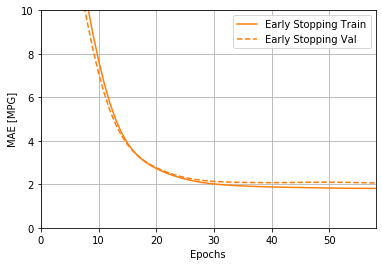

In [27]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [28]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.3104 - mae: 1.9554 - mse: 6.3104
Testing set Mean Abs Error:  1.96 MPG


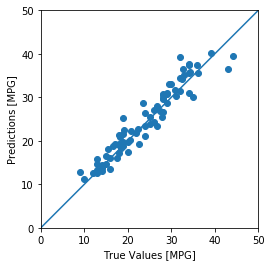

In [29]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

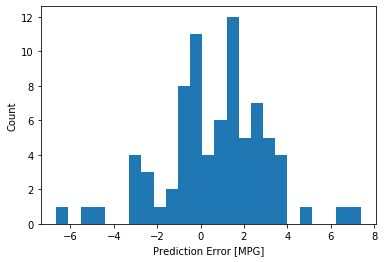

In [30]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")